In [76]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
#Loading the dataset
df=pd.read_csv("Data Group 4.csv")

In [3]:
#View data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#misssing values from each column
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#find the total number of missing values from the whole/entire dataset
df.isnull().sum().sum()

127

In [6]:
df.mean()

ApplicantIncome      5497.013645
CoapplicantIncome    1537.364366
LoanAmount            144.739394
Loan_Amount_Term      343.118236
Credit_History          0.846809
dtype: float64

In [7]:
#Handling missing values
#Filling using mode
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Using median
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Using forward fill
cols=['Dependents']
df.loc[:,cols]=df.loc[:,cols].ffill()
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Using arbitrary value
cols=['Credit_History']
df.loc[:,cols]=df.loc[:,cols].ffill()
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Using median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#Deliting rows with missing values under gender
df=df.dropna(axis=0)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

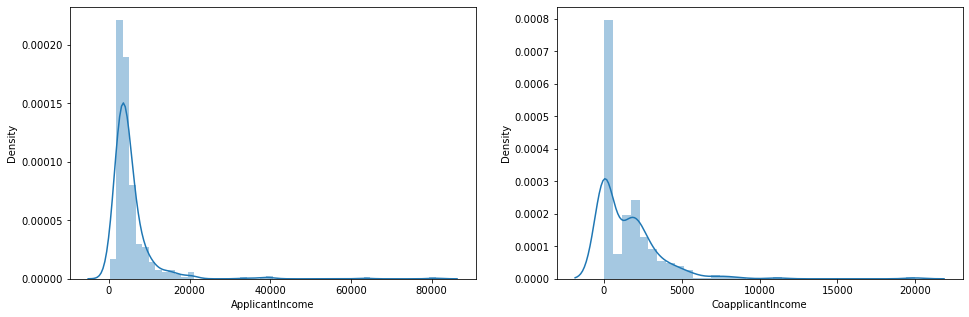

In [18]:
#Detecting outliers
#distribution plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'])
plt.show()

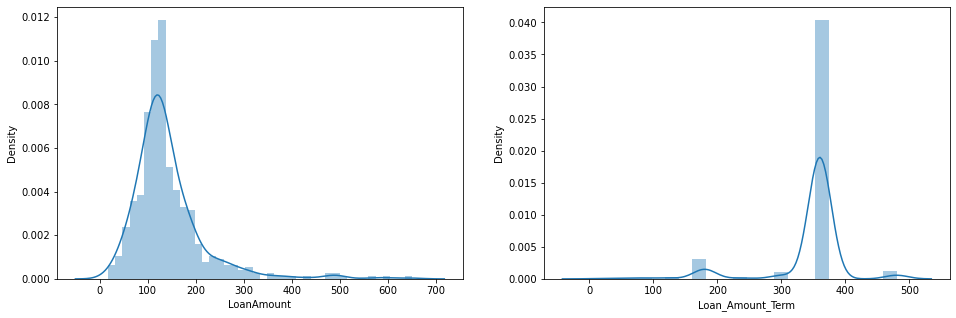

In [19]:
#Detecting outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])
plt.subplot(1,2,2)
sns.distplot(df['Loan_Amount_Term'])
plt.show()

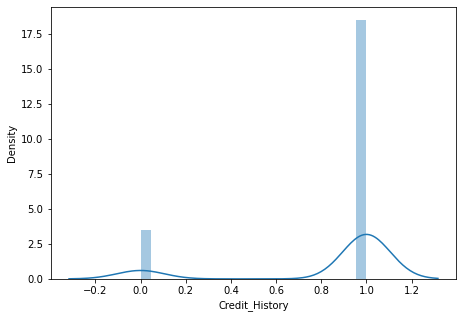

In [20]:
#Detecting outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Credit_History'])
plt.show()

In [21]:

print("Highest allowed",df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std())
print("Lowest allowed",df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std())

Highest allowed 23758.3763844654
Lowest allowed -13011.553322835181


In [22]:
#finding outliers
df[(df['ApplicantIncome']>24695.80)|(df['ApplicantIncome']<-13625.74)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [23]:
print("Highest allowed",df['Loan_Amount_Term'].mean()+3*df['Loan_Amount_Term'].std())
print("Lowest allowed",df['Loan_Amount_Term'].mean()-3*df['Loan_Amount_Term'].std())

Highest allowed 531.8185489419398
Lowest allowed 155.64069559086346


In [24]:
#finding outliers
df[(df['Loan_Amount_Term']>531.58)|(df['Loan_Amount_Term']<155.24)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
262,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,1.0,Rural,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,Y


In [25]:
print("Highest allowed",df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std())
print("Lowest allowed",df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std())

Highest allowed 7988.198902584304
Lowest allowed -4919.316516943588


In [26]:
#finding outliers
df[(df['CoapplicantIncome']>8258.69)|(df['CoapplicantIncome']<-5165.01)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,1.0,Rural,Y


In [27]:
print("Highest allowed",df['LoanAmount'].mean()+3*df['LoanAmount'].std())
print("Lowest allowed",df['LoanAmount'].mean()-3*df['LoanAmount'].std())

Highest allowed 376.73091800865035
Lowest allowed -91.47048063290481


In [28]:
#finding outliers
df[(df['LoanAmount']>384.40)|(df['LoanAmount']<-96.22)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,0.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
432,LP002386,Male,No,0,Graduate,No,12876,0.0,405.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,1.0,Urban,Y


In [29]:
print("Highest allowed",df['Credit_History'].mean()+3*df['Credit_History'].std())
print("Lowest allowed",df['Credit_History'].mean()-3*df['Credit_History'].std())

Highest allowed 1.9392026783327816
Lowest allowed -0.2572941296250282


In [30]:
#finding outliers
df[(df['Credit_History']>1.92)|(df['Credit_History']<-0.21)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [31]:
#Handling outliers
#Trimming
new_df=df[(df['ApplicantIncome']<24695.80)&(df['ApplicantIncome']>-13625.74)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [32]:
#Capping Outliers
upper_limit=df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std()
lower_limit=df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std()

In [33]:
#Apply the capping
df['ApplicantIncome']=np.where(
df['ApplicantIncome']>upper_limit,upper_limit,np.where(df['ApplicantIncome']<lower_limit,lower_limit,df['ApplicantIncome'])
)

In [34]:
#Describe
df['ApplicantIncome'].describe()

count      503.000000
mean      5070.235106
std       3880.540106
min        150.000000
25%       2885.500000
50%       3850.000000
75%       5736.000000
max      23758.376384
Name: ApplicantIncome, dtype: float64

In [35]:
#Handling outliers
#Trimming
new_df=df[(df['CoapplicantIncome']<8258.69)&(df['CoapplicantIncome']>-5165.01)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [36]:
#Capping Outliers
upper_limit=df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std()
lower_limit=df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std()

In [37]:
#Apply the capping
df['CoapplicantIncome']=np.where(
df['CoapplicantIncome']>upper_limit,upper_limit,np.where(df['CoapplicantIncome']<lower_limit,lower_limit,df['CoapplicantIncome'])
)

In [38]:
#Describe
df['CoapplicantIncome'].describe()

count     503.000000
mean     1471.280939
std      1786.177506
min         0.000000
25%         0.000000
50%      1167.000000
75%      2292.500000
max      7988.198903
Name: CoapplicantIncome, dtype: float64

In [39]:
#Handling outliers
#Trimming
new_df=df[(df['LoanAmount']<384.40)&(df['LoanAmount']>-96.22)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [40]:
#Capping Outliers
upper_limit=df['LoanAmount'].mean()+3*df['LoanAmount'].std()
lower_limit=df['LoanAmount'].mean()-3*df['LoanAmount'].std()

In [41]:
#Apply the capping
df['LoanAmount']=np.where(
df['LoanAmount']>upper_limit,upper_limit,np.where(df['LoanAmount']<lower_limit,lower_limit,df['LoanAmount'])
)

In [42]:
#Describe
df['LoanAmount'].describe()

count    503.000000
mean     139.962306
std       66.130486
min       17.000000
25%      100.000000
50%      127.000000
75%      160.000000
max      376.730918
Name: LoanAmount, dtype: float64

In [43]:

#Handling outliers
#Trimming
new_df=df[(df['Loan_Amount_Term']<531.58)&(df['Loan_Amount_Term']>155.24)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [44]:
#Capping Outliers
upper_limit=df['Loan_Amount_Term'].mean()+3*df['Loan_Amount_Term'].std()
lower_limit=df['Loan_Amount_Term'].mean()-3*df['Loan_Amount_Term'].std()

In [45]:
#Apply the capping
df['Loan_Amount_Term']=np.where(
df['Loan_Amount_Term']>upper_limit,upper_limit,np.where(df['Loan_Amount_Term']<lower_limit,lower_limit,df['Loan_Amount_Term'])
)

In [46]:
#Describe
df['Loan_Amount_Term'].describe()

count    503.000000
mean     345.130748
std       57.154538
min      155.640696
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [47]:
#Descriptive Analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,5070.235106,1471.280939,139.962306,345.130748,0.840954
std,3880.540106,1786.177506,66.130486,57.154538,0.366083
min,150.000000,0.000000,17.000000,155.640696,0.000000
25%,2885.500000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,1167.000000,127.000000,360.000000,1.000000
75%,5736.000000,2292.500000,160.000000,360.000000,1.000000
max,23758.376384,7988.198903,376.730918,480.000000,1.000000


In [48]:
df.median()

ApplicantIncome      3850.0
CoapplicantIncome    1167.0
LoanAmount            127.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [49]:
df.skew()

ApplicantIncome      2.616581
CoapplicantIncome    1.454701
LoanAmount           1.569409
Loan_Amount_Term    -1.988246
Credit_History      -1.870153
dtype: float64

In [50]:
df.shape

(503, 13)

In [51]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [54]:
#dependents column
df['Dependents'].value_counts()

0     299
1      84
2      82
3+     38
Name: Dependents, dtype: int64

In [55]:
#change 3+ to 4
df=df.replace(to_replace='3+',value=4)

In [56]:
df['Dependents'].value_counts()

0    299
1     84
2     82
4     38
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

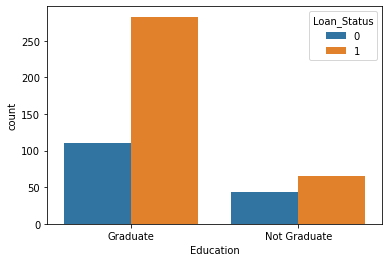

In [57]:
#education and loan status
sns.countplot(x='Education', hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

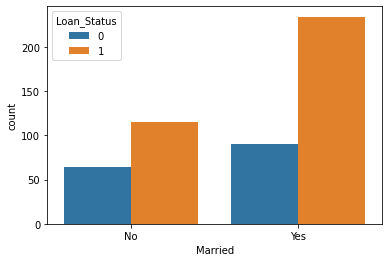

In [58]:
#marital status and loan status
sns.countplot(x='Married', hue='Loan_Status',data=df)

In [59]:
#FEATURE EXTRACTION
#converting cataegorical columns to numeric values
df.replace({"Married":{'No':0,'Yes':1},"Gender":{'Male':1,'Female':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},"Education":{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [61]:
#Model tuning
#separating data into dependent and independent variables
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [62]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0           5849.0   
1         1        1          1          1              0           4583.0   
2         1        1          0          1              1           3000.0   
3         1        1          0          0              0           2583.0   
4         1        0          0          1              0           6000.0   
..      ...      ...        ...        ...            ...              ...   
508       1        1          0          1              1           2479.0   
509       0        0          1          1              0          13262.0   
510       1        0          0          0              0           3598.0   
511       1        1          1          1              0           6065.0   
512       1        1          2          1              0           3283.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [63]:
#Splitting data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(503, 11) (452, 11) (51, 11)


<function matplotlib.pyplot.show(close=None, block=None)>

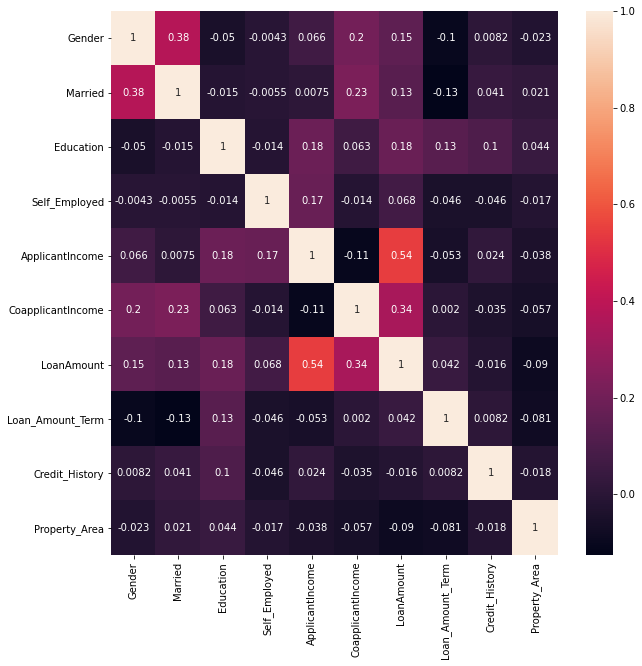

In [65]:
plt.figure(figsize=(10,10))
correlation_matrix=X_train.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [77]:
#creating model
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [78]:
#training model
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
accuracy_score(Y_test,y_pred)

0.6666666666666666

In [81]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.714


In [82]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.857


In [83]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.779
